In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**World University Rankings Dataset: Data Science and Visualization Study**

This notebook demonstrates the step-by-step process of data cleaning, fixing missing values, and performing basic visualizations using the World University Rankings dataset.


**Importing Libraries**

Import necessary libraries for data manipulation, visualization, and handling warnings.

In [216]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


**Loading Data**

Load the dataset containing world university rankings.

In [217]:
df = pd.read_csv("/kaggle/input/world-university-rankings/timesData.csv")


**Handling Inf Values**

Replace infinite values with NaN to handle them effectively.


In [218]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

**Cleaning world_rank Column**

Define and apply a function to clean the world_rank column by handling different formats.

In [219]:
def clean_ranking(value):
    if isinstance(value, str):
        if "=" in value:
            return int(value.replace("=", "").strip())
        elif "-" in value:
            start, end = map(int, value.split("-"))
            return (start + end) / 2
        else:
            try:
                return int(value)
            except ValueError:
                return np.nan
    return value

df["world_rank"] = df["world_rank"].apply(clean_ranking)


**Correcting Country Names**

Correct misspelled country names in the dataset.



In [220]:
corrections = {"Unisted States of America": "United States of America", "Unted Kingdom": "United Kingdom"}
df["country"] = df["country"].replace(corrections)


**Processing Numerical Columns**

Define and apply a function to process numerical columns, converting to numeric types and filling missing values.

In [221]:
def process_numerical_columns(columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)

numeric_columns = ["teaching", "international", "research", "citations", "income", "total_score"]
process_numerical_columns(numeric_columns)


**Cleaning num_students Column**

Clean the num_students column by removing commas and filling missing values with the median.

In [222]:
def clean_student_numbers(value):
    return float(str(value).replace(',', ''))

df["num_students"] = df["num_students"].apply(clean_student_numbers)
df["num_students"].fillna(df["num_students"].median(), inplace=True)


**Processing female_male_ratio Column**

Clean and split the female_male_ratio into separate columns for female and male percentages.



In [223]:
df["female_male_ratio"] = df["female_male_ratio"].apply(lambda x: "50 : 50" if pd.isna(x) else x)

def split_gender_ratio(ratio):
    try:
        female, male = map(float, ratio.split(":"))
        return female, male
    except:
        return 50.0, 50.0

df[['female_percent', 'male_percent']] = df["female_male_ratio"].apply(split_gender_ratio).apply(pd.Series)
df.drop(columns=["female_male_ratio"], inplace=True)


**Inspecting Data**

Display the first five rows of the cleaned dataset.

In [224]:
print("First 5 rows of the datase:")
print(df.head())

First 5 rows of the datase:
   world_rank                        university_name  \
0         1.0                     Harvard University   
1         2.0     California Institute of Technology   
2         3.0  Massachusetts Institute of Technology   
3         4.0                    Stanford University   
4         5.0                   Princeton University   

                    country  teaching  international  research  citations  \
0  United States of America      99.7           72.4      98.7       98.8   
1  United States of America      97.7           54.6      98.0       99.9   
2  United States of America      97.8           82.3      91.4       99.9   
3  United States of America      98.3           29.5      98.1       99.2   
4  United States of America      90.9           70.3      95.4       99.9   

      income  total_score  num_students  student_staff_ratio  \
0  34.500000         96.1       20152.0                  8.9   
1  83.700000         96.0        2243.0     

**Visualizing World Ranking**

Create a scatter plot to visualize world rankings using Plotly.

In [225]:
fig = px.scatter(df, x='total_score', y='world_rank', color='country', hover_name='university_name',
                 title='World University Rankings', labels={'total_score': 'Total Score', 'world_rank': 'World Rank'})
fig.show()

**Correlation Matrix Heatmap**

Plot a heatmap to show correlations between numerical columns.

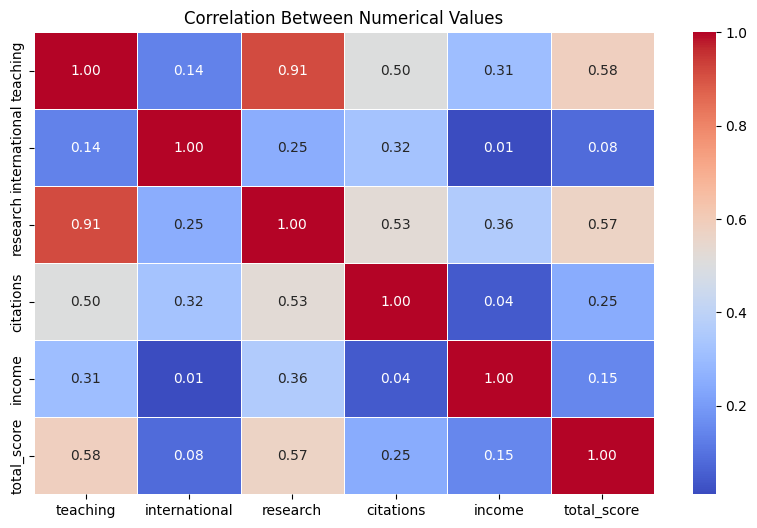

In [190]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Numerical Values')
plt.show()

**Relationship between num_students and Gender Ratio**

Visualize the relationship between the number of students and gender ratio.

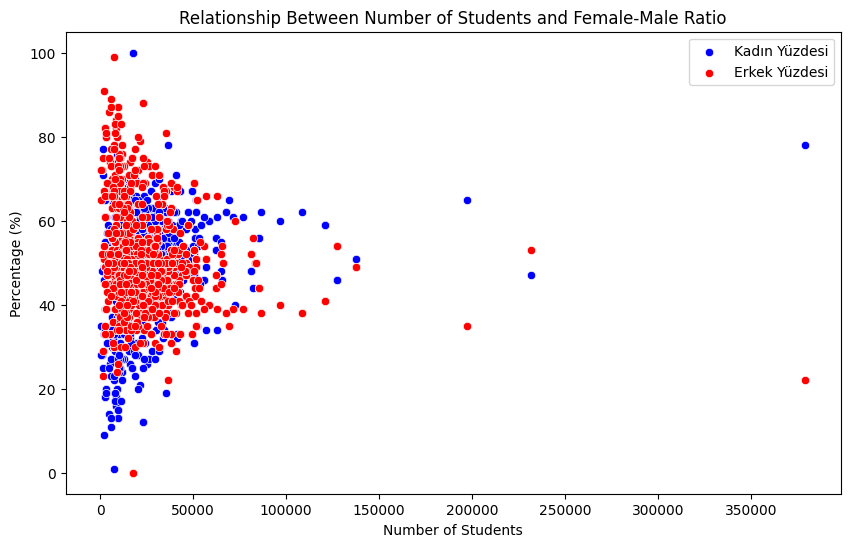

In [191]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_students', y='female_percent', data=df, color='blue', label='Kadın Yüzdesi')
sns.scatterplot(x='num_students', y='male_percent', data=df, color='red', label='Erkek Yüzdesi')
plt.title('Relationship Between Number of Students and Female-Male Ratio')
plt.xlabel('Number of Students')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

**Bar Chart for Top-Ranked Countries**

 Create a bar chart for the top-ranked countries.

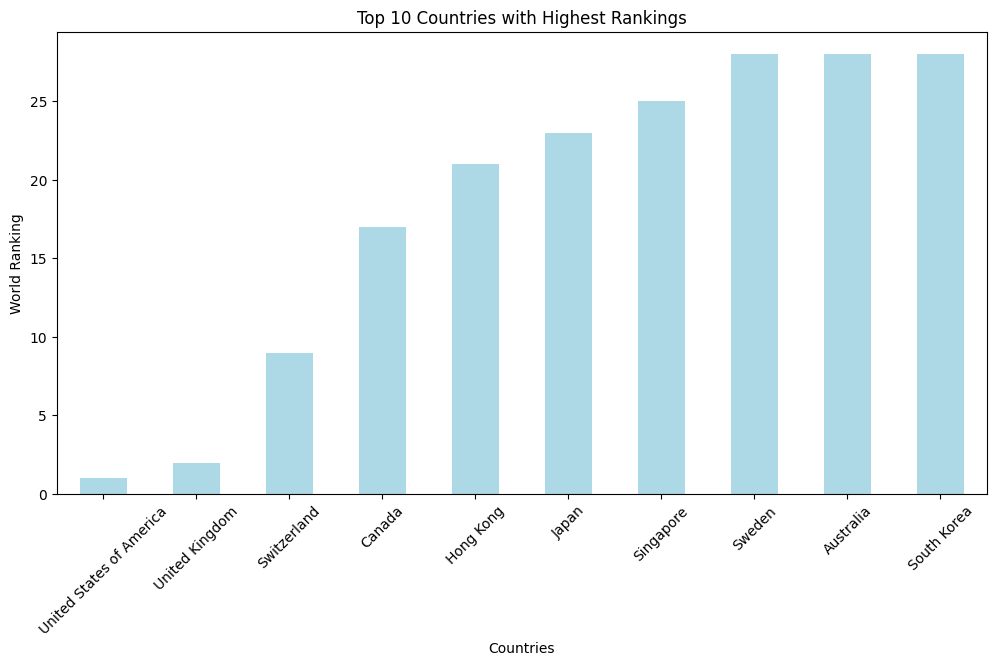

In [192]:
top_countries = df.groupby('country')['world_rank'].min().sort_values().head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='lightblue')
plt.title('Top 10 Countries with Highest Rankings')
plt.xlabel('Countries')
plt.ylabel('World Ranking')
plt.xticks(rotation=45)
plt.show()

**Identifying and Visualizing Outliers**

 Identify and visualize outliers in the total_score feature using boxplots.

Outliers:       world_rank                        university_name  \
0            1.0                     Harvard University   
1            2.0     California Institute of Technology   
2            3.0  Massachusetts Institute of Technology   
3            4.0                    Stanford University   
4            5.0                   Princeton University   
...          ...                                    ...   
1998       196.0                   Newcastle University   
1999       196.0      St George’s, University of London   
2000       198.0                   University of Trento   
2001       199.0     Paris Diderot University – Paris 7   
2002       200.0             Queen’s University Belfast   

                       country  teaching  international  research  citations  \
0     United States of America      99.7           72.4      98.7       98.8   
1     United States of America      97.7           54.6      98.0       99.9   
2     United States of America      97.8 

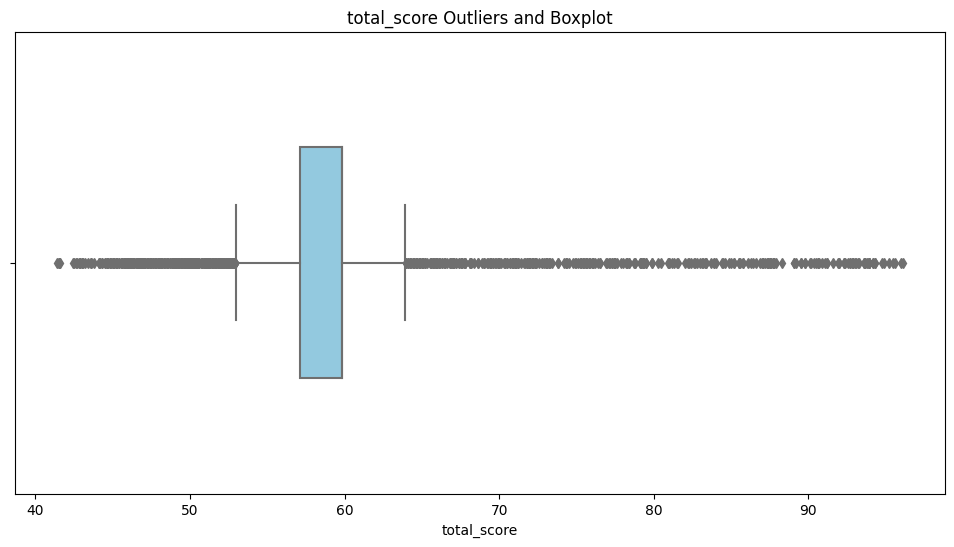

In [193]:
def identify_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

outliers = identify_outliers("total_score")
print(f"Outliers: {outliers}")

def visualize_outliers(feature):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[feature], color="skyblue", width=0.5)
    plt.title(f'{feature} Outliers and Boxplot')
    plt.show()

visualize_outliers("total_score")

**Distribution of total_score**

Plot the distribution of total_score with a histogram and KDE plot.

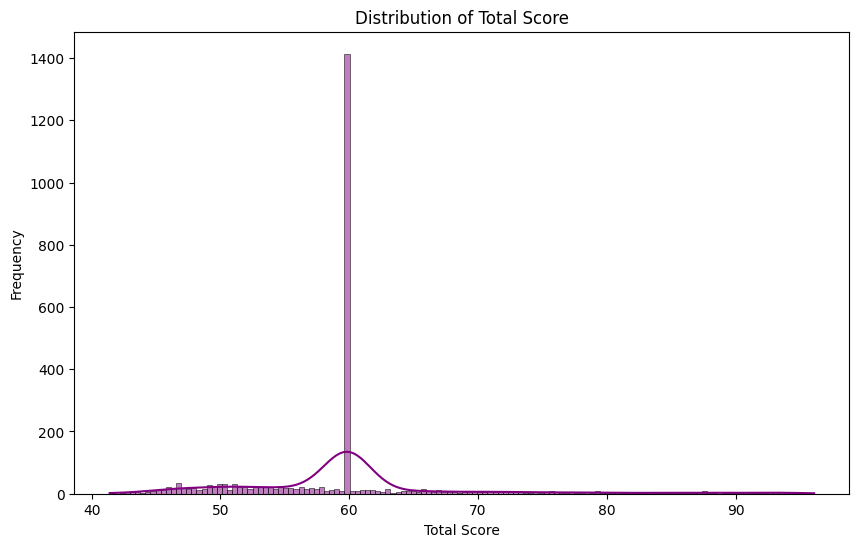

In [194]:
plt.figure(figsize=(10, 6))
sns.histplot(df["total_score"], kde=True, color='purple')
plt.title('Distribution of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()

**Pairplot for Numerical Data Relationships**

Generate pair plots to examine relationships between numerical columns.


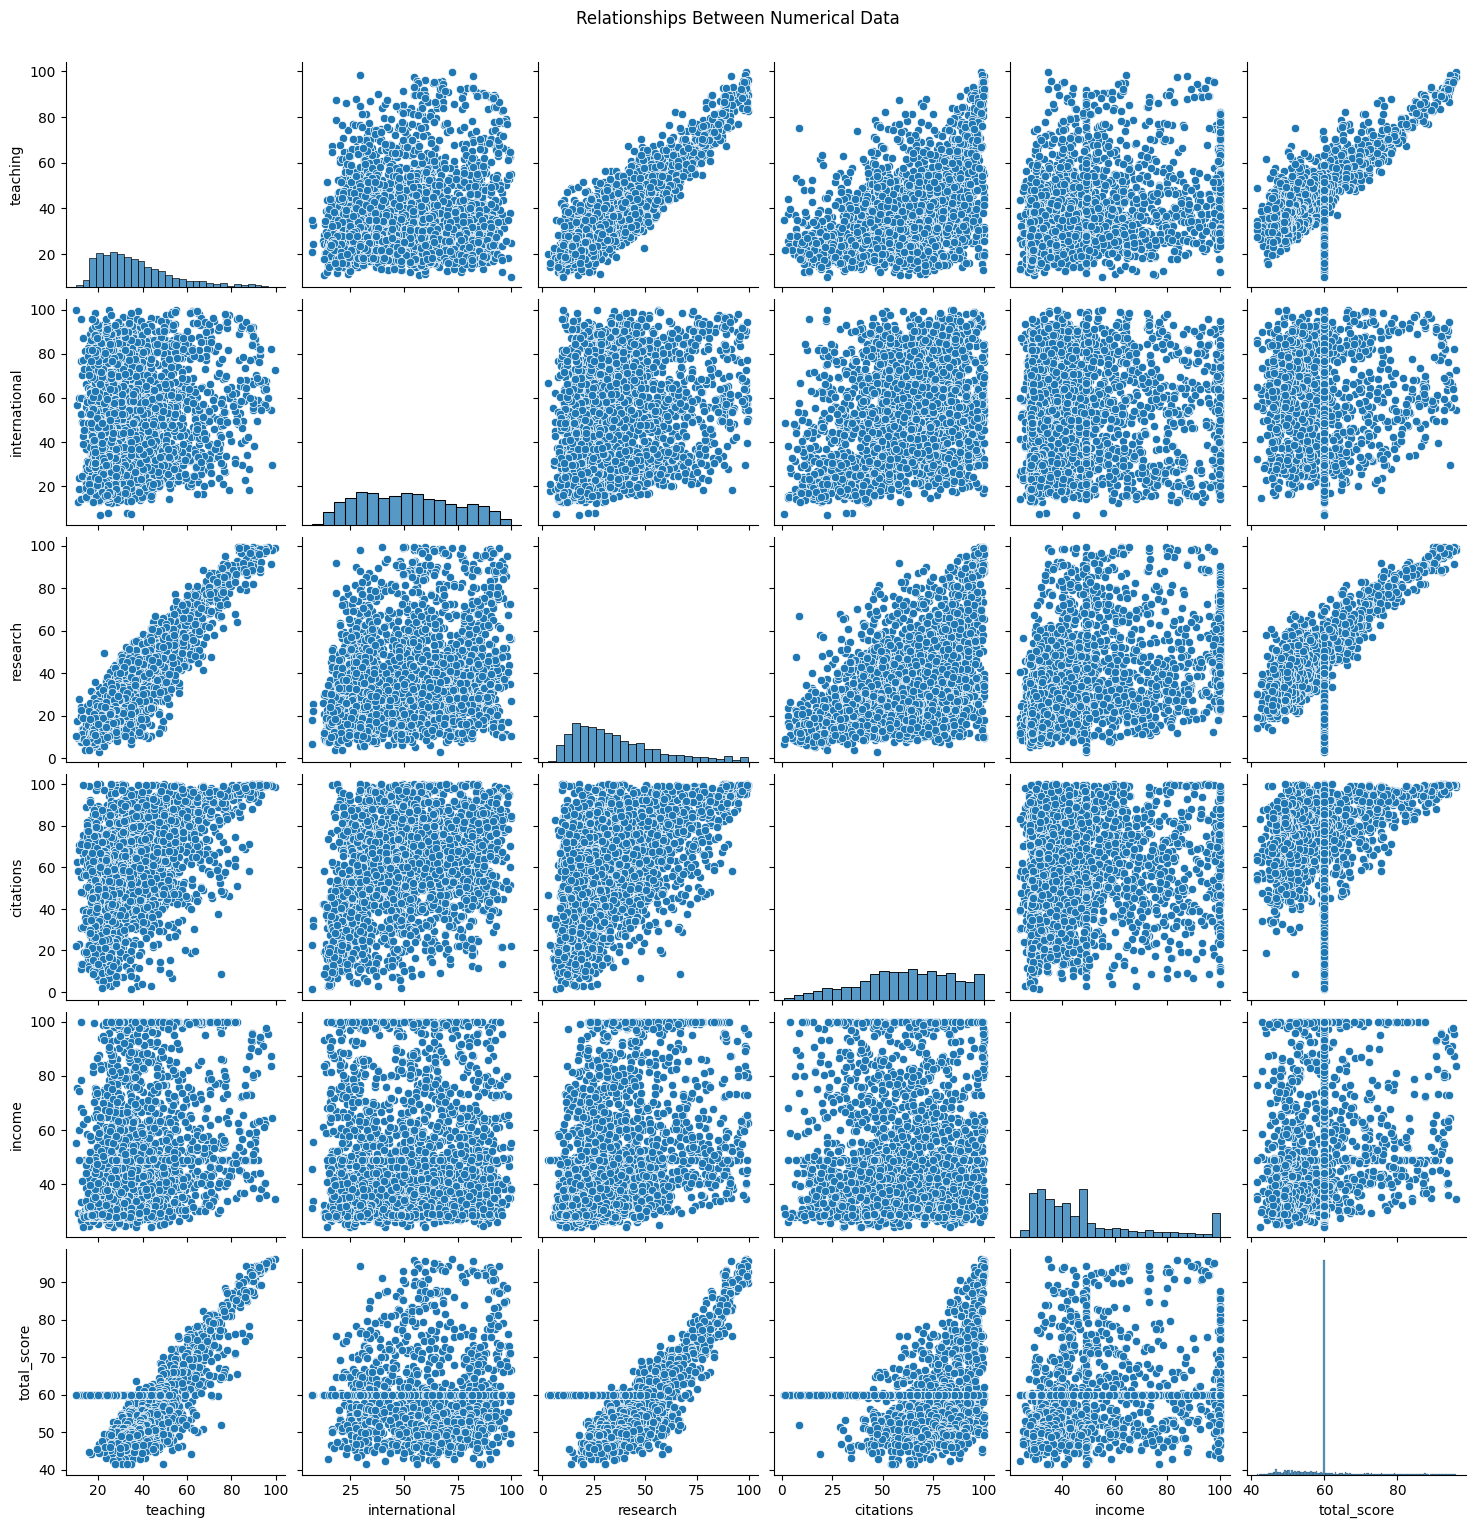

In [195]:
sns.pairplot(df[numeric_columns])
plt.suptitle("Relationships Between Numerical Data", y=1.02)
plt.show()

**Pivot Table for Average Total Score by Country**

Create a pivot table and bar chart to show the average total score by country

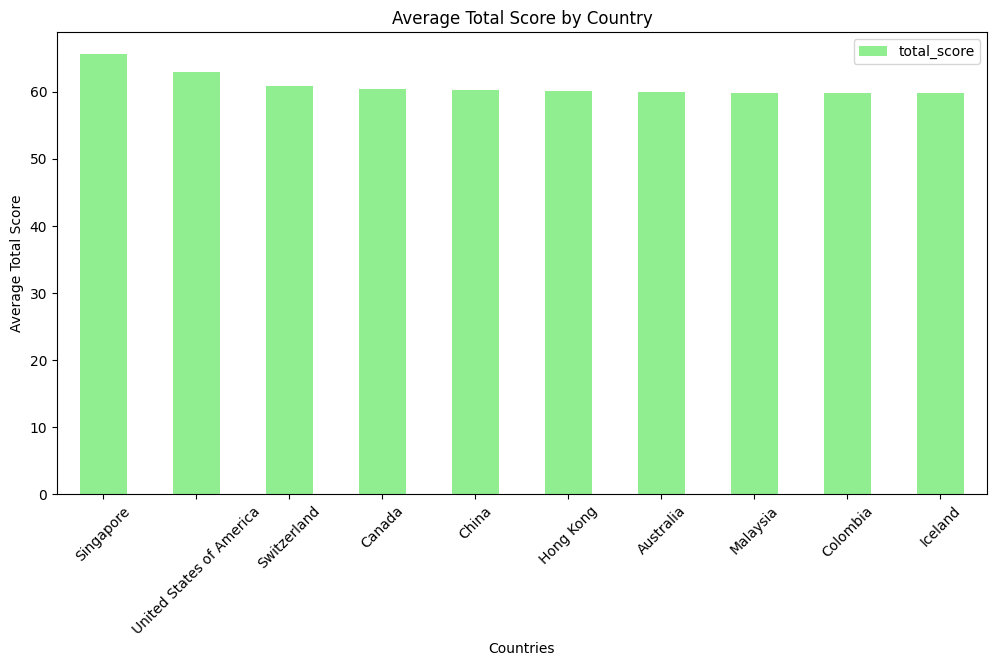

In [196]:
pivot_table = df.pivot_table(values='total_score', index='country', aggfunc='mean')
pivot_table = pivot_table.sort_values(by='total_score', ascending=False).head(10)
pivot_table.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Average Total Score by Country')
plt.xlabel('Countries')
plt.ylabel('Average Total Score')
plt.xticks(rotation=45)
plt.show()

**Bivariate Analysis: research vs total_score**

Examine the relationship between research scores and total_score using a scatter plot.



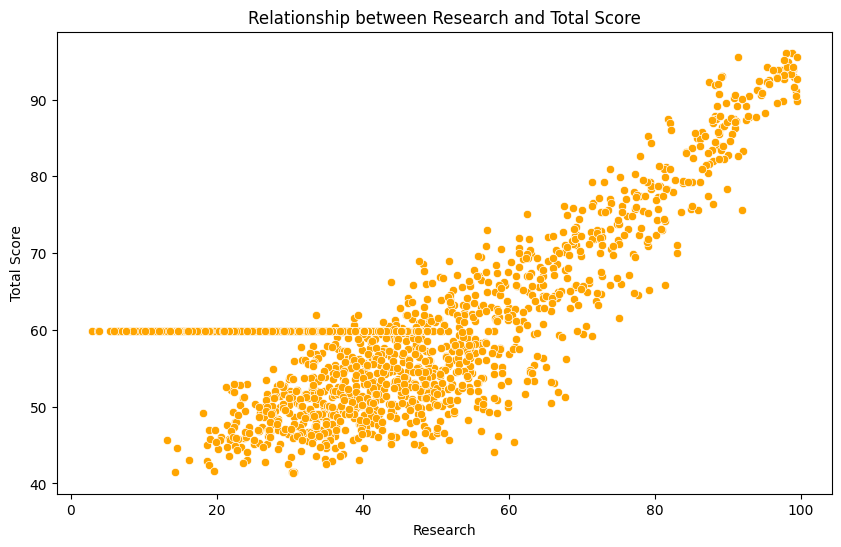

In [197]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='research', y='total_score', data=df, color='orange')
plt.title('Relationship between Research and Total Score')
plt.xlabel('Research')
plt.ylabel('Total Score')
plt.show()

**Bar Plot for Average Teaching Score by Country**

Visualize the average teaching scores by country using a bar chart.

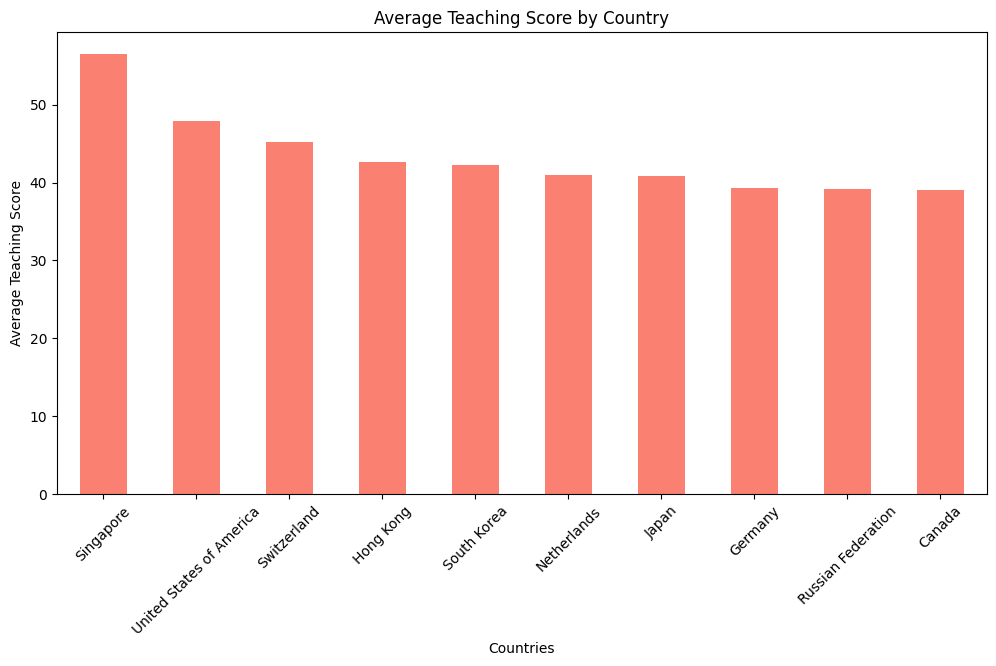

In [198]:
teaching_avg = df.groupby('country')['teaching'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
teaching_avg.plot(kind='bar', color='salmon')
plt.title('Average Teaching Score by Country')
plt.xlabel('Countries')
plt.ylabel('Average Teaching Score')
plt.xticks(rotation=45)
plt.show()